In [34]:
import pandas as pd

raw_data = {
    'id' : [6,7,8,9],
    'city' : ['New York', 'Tainan', 'Storrs', 'Atlantic City'],
    'rank' : ['39', '1', '20', '15'],
    'population' : ['3M', '720K', '10K', '50K']
}

df_city_info = pd.DataFrame(raw_data, 
                            index = pd.Index(['A', 'B', 'C', 'D'], name='letter'),
                            columns = pd.Index(['id', 'city', 'rank', 'population'], name='attributes'))

df_city_info

attributes,id,city,rank,population
letter,,,,
A,6,New York,39,3M
B,7,Tainan,1,720K
C,8,Storrs,20,10K
D,9,Atlantic City,15,50K


In [41]:
df_city_info_stack = df_city_info.stack(0)

In [42]:
df_city_info_stack.unstack()

attributes,id,city,rank,population
letter,,,,
A,6,New York,39,3M
B,7,Tainan,1,720K
C,8,Storrs,20,10K
D,9,Atlantic City,15,50K


In [38]:
df_city_info_stack.unstack(0)

letter,A,B,C,D
attributes,,,,
id,6,7,8,9
city,New York,Tainan,Storrs,Atlantic City
rank,39,1,20,15
population,3M,720K,10K,50K


In [39]:
df_city_info_stack.unstack(1)

attributes,id,city,rank,population
letter,,,,
A,6,New York,39,3M
B,7,Tainan,1,720K
C,8,Storrs,20,10K
D,9,Atlantic City,15,50K


## Map ##
http://www.bogotobogo.com/python/python_fncs_map_filter_reduce.php

In [22]:
list(map((lambda x: x **2), [1, 2, 3]))

[1, 4, 9]

In [23]:
list(map(pow, [2,3,4], [10, 11, 12]))

[1024, 177147, 16777216]

## Filter ##

In [24]:
list( filter((lambda x: x < 0), range(-5,5)))

[-5, -4, -3, -2, -1]

In [26]:
a = [1,2,3,5,7,9]
b = [2,3,5,6,7,8]
print (list(filter(lambda x: x in a, b)))  # prints out [2, 3, 5, 7]

[2, 3, 5, 7]


## Reduce ##

In [27]:
import functools
L = ['Testing ', 'shows ', 'the ', 'presence', ', ','not ', 'the ', 'absence ', 'of ', 'bugs']
functools.reduce( (lambda x,y:x+y), L)

'Testing shows the presence, not the absence of bugs'

In [28]:
''.join(L)

'Testing shows the presence, not the absence of bugs'

In [32]:
import functools, operator
functools.reduce(operator.add, L)

'Testing shows the presence, not the absence of bugs'

## Assign dataframe ##

In [3]:
import numpy as np
import pandas as pd
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan

dff

,A,B,C
0,0.801233,-0.012916,1.018676
1,-0.013520,-1.801691,0.171021
2,-0.190176,-0.301064,-0.570777
3,NaN,0.557317,-0.741845
4,NaN,NaN,0.636996
5,0.030736,NaN,NaN
6,-0.400781,-0.734255,NaN
7,-1.028341,0.704548,NaN
8,0.659738,1.352876,-0.496474
9,0.883353,0.697980,0.066969


In [5]:
dff.A.isnull().any()

True

In [8]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
A    8 non-null float64
B    8 non-null float64
C    7 non-null float64
dtypes: float64(3)
memory usage: 320.0 bytes


## Merge example ##

In [9]:
import pandas as pd
left = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                       'A': ['A0', 'A1', 'A2', 'A3'],
                       'B': ['B0', 'B1', 'B2', 'B3']})

left_more = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3', 'K4', 'K0'],
                       'A': ['A0', 'A1', 'A2', 'A3', 'A4', 'A0'],
                       'B': ['B0', 'B1', 'B2', 'B3', 'B4', 'B0']})


right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],  
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
 

In [10]:
print(left)

    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3


In [14]:
left[left['key'] == 'K1']

,A,B,key
1,A1,B1,K1


In [2]:
    
## DataFrame.duplicated(subset=None, keep='first')[source]

left_more_dup_in_A = left_more.duplicated()

print(left_more_dup_in_A.value_counts())

print(left_more.duplicated())
print(left_more['A'].duplicated())
print(left_more_dup_in_A.values)

print(left_more[left_more_dup_in_A.values])
print(type(left_more_dup_in_A))

print(left)
print(" ")
print(left_more)
print(" ")
print(right)

mix_on = pd.merge(left_more[['A', 'key']], right[['C', 'key']], on='key')

print(mix_on)

mix_left = pd.merge(left_more[['A', 'key']], right[['C', 'key']], how='left', on='key')

print(mix_left)

left_and_more_left = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='left', on='A')
print(left_and_more_left)


left_and_more_inner = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='inner', on='A')
print(left_and_more_inner)


left_and_more_right = pd.merge(left[['A', 'key']], left_more[['A', 'key']], how='right', on='A')
print(left_and_more_right)

False    5
True     1
dtype: int64
0    False
1    False
2    False
3    False
4    False
5     True
dtype: bool
0    False
1    False
2    False
3    False
4    False
5     True
Name: A, dtype: bool
[False False False False False  True]
    A   B key
5  A0  B0  K0
<class 'pandas.core.series.Series'>
    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
 
    A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K2
3  A3  B3  K3
4  A4  B4  K4
5  A0  B0  K0
 
    C   D key
0  C0  D0  K0
1  C1  D1  K1
2  C2  D2  K2
3  C3  D3  K3
    A key   C
0  A0  K0  C0
1  A0  K0  C0
2  A1  K1  C1
3  A2  K2  C2
4  A3  K3  C3
    A key    C
0  A0  K0   C0
1  A1  K1   C1
2  A2  K2   C2
3  A3  K3   C3
4  A4  K4  NaN
5  A0  K0   C0
    A key_x key_y
0  A0    K0    K0
1  A0    K0    K0
2  A1    K1    K1
3  A2    K2    K2
4  A3    K3    K3
    A key_x key_y
0  A0    K0    K0
1  A0    K0    K0
2  A1    K1    K1
3  A2    K2    K2
4  A3    K3    K3
    A key_x key_y
0  A0    K0    K0
1  A0    K0    

| code | label |
| :--: |:--|
|1|Fatal|
|2|Serious|
|3|Slight|

In [105]:
print(__doc__)

from time import time

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter

from sklearn import manifold, datasets

# Next line to silence pyflakes. This import is needed.
Axes3D

n_points = 1000
X, color = datasets.samples_generator.make_s_curve(n_points, random_state=0)
n_neighbors = 10
n_components = 2

Automatically created module for IPython interactive environment


In [106]:
print(X.shape)
print(color.shape)

(1000, 3)
(1000,)


In [107]:
fig = plt.figure(figsize=(15, 8))
plt.suptitle("Manifold Learning with {} points and {} neighbors."\
             .format(n_points, n_neighbors), fontsize=14)

ax = fig.add_subplot(251, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)

standard: 0.3 sec
ltsa: 0.57 sec
hessian: 0.74 sec
modified: 0.66 sec
Isomap: 0.64 sec
MDS: 4.5 sec
SpectralEmbedding: 0.29 sec
t-SNE: 33 sec


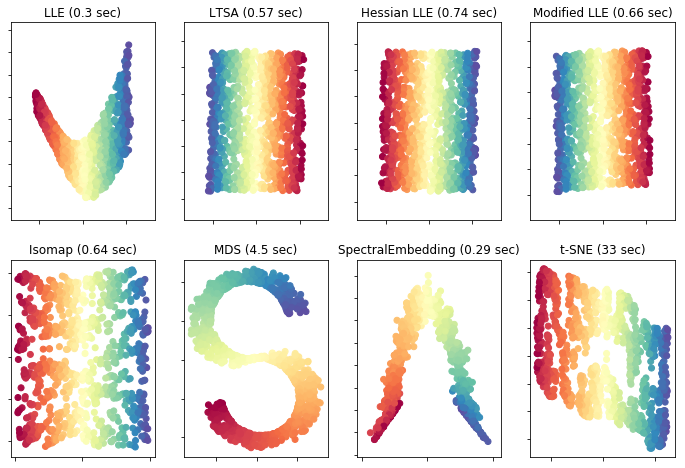

In [108]:
methods = ['standard', 'ltsa', 'hessian', 'modified']
labels = ['LLE', 'LTSA', 'Hessian LLE', 'Modified LLE']
plt.clf()
for i, method in enumerate(methods):
    t0 = time()
    Y = manifold.LocallyLinearEmbedding(n_neighbors, n_components, \
                                       eigen_solver='auto',\
                                       method=method).fit_transform(X)
    t1 = time()
    print("{:s}: {:.2g} sec".format(methods[i], t1 - t0))
    
    ax = fig.add_subplot(252 + i)
    plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    plt.title("{:s} ({:.2g} sec)".format(labels[i], t1- t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis('tight')

t0 = time()
Y = manifold.Isomap(n_neighbors, n_components).fit_transform(X)
t1 = time()
print("Isomap: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(257)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("Isomap (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')
    
t0 = time()
Y = manifold.MDS(n_components, max_iter=100, n_init=1).fit_transform(X)
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(258)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.SpectralEmbedding(n_components=n_components,
                                n_neighbors=n_neighbors).fit_transform(X)
t1 = time()
print("SpectralEmbedding: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(259)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("SpectralEmbedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

t0 = time()
Y = manifold.TSNE(n_components=n_components, init='pca', random_state=0).fit_transform(X)
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))
ax = fig.add_subplot(2, 5, 10)
plt.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis('tight')

    
plt.show()
plt.gcf().clear()

### Remove the N/A data entry ###

In [35]:
## http://scikit-learn.org/stable/auto_examples/manifold/plot_compare_methods.html#sphx-glr-auto-examples-manifold-plot-compare-methods-py
print(__doc__)

from time import time
import pandas as pd
import numpy as np
from IPython.display import display
from sklearn.datasets import load_iris

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets

iris_data = load_iris()

iris_x = iris_data.data
iris_y = iris_data.target

#print(iris_x)
# df1 = pd.DataFrame({'A': [np.nan, '9', '23', '15'],
#                     'B': ['22', '-4', '0', '-4'],
#                     'C': ['90', '33', 0, '0'],
#                     'D': ['994', np.nan, '5', '432']},
#                     index=[0, 1, 2, 3])
# print("Watch out the difference between integer and string")
# print(df1) 

In [24]:
print(iris_x[:3])

[[ 5.1  3.5  1.4  0.2]
 [ 4.9  3.   1.4  0.2]
 [ 4.7  3.2  1.3  0.2]]


In [26]:
print(dir(iris_data))
print(iris_data.feature_names)
print(iris_data.target_names)


['DESCR', 'data', 'feature_names', 'target', 'target_names']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


In [28]:
df1 = pd.DataFrame(iris_x, columns=iris_data.feature_names)
display(df1.head(3))

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [43]:
## Clean the data
counter_nan = df1.isnull().sum()
print(counter_nan)

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [44]:
counter_without_nan = counter_nan[counter_nan==0]
## remove the columns with missing elements
df1_all = df1[counter_without_nan.keys()]

In [45]:
## remove the column by its indexes
# df1_all = df1_all.iloc[:,:2]

In [46]:
from sklearn.preprocessing import StandardScaler
x = df1_all.iloc[:, :].values
standard_scalar = StandardScaler()
x_std = standard_scalar.fit_transform(x)

In [74]:
print(x_std)
print(x_std.shape)

[[ -9.00681170e-01   1.03205722e+00  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00  -1.24957601e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.38535265e+00   3.37848329e-01  -1.39813811e+00  -1.31297673e+00]
 [ -1.50652052e+00   1.06445364e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.02184904e+00   1.26346019e+00  -1.34127240e+00  -1.31297673e+00]
 [ -5.37177559e-01   1.95766909e+00  -1.17067529e+00  -1.05003079e+00]
 [ -1.50652052e+00   8.00654259e-01  -1.34127240e+00  -1.18150376e+00]
 [ -1.02184904e+00   8.00654259e-01  -1.28440670e+00  -1.31297673e+00]
 [ -1.74885626e+00  -3.56360566e-01  -1.34127240e+00  -1.31297673e+00]
 [ -1.14301691e+00   1.06445364e-01  -1.28440670e+00  -1.44444970e+00]
 [ -5.37177559e-01   1.49486315e+00  -1.28440670e+00  -1.31297673e+00]
 [ -1.26418478e+00   8.00654259e-01  -1.22754100e+00  -1.31297673e+00]
 [ -1.26418478e+00  -1.24957601e-01  -1.34127240e+00  -1.44444970e+00]
 [ -1.87002413e+00  -1.24957601e-01  -1.51186952e+00  -1.44444970e+00]
 [ -5.

### T distributed stochastic neighbor embedding (t-SNE) visualization ###

In [47]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state = 311)
x_test_2d = tsne.fit_transform(x_std)

In [67]:
print(x_test_2d.shape)
print(x_test_2d[:5])

(150, 2)
[[ 15.40242863 -14.17713165]
 [ 16.77496719 -10.51078129]
 [ 15.68960285 -11.44600105]
 [ 15.7251873  -10.68215561]
 [ 15.75592995 -14.78833389]]


In [68]:
print(np.unique(x_test_2d).shape)
print(np.unique(x_test_2d)[:5])

(298,)
[-17.48503876 -17.2306118  -17.01259232 -16.83356667 -16.43995857]


In [71]:
aa = np.array([1, 2, 3, 4, 3])
print(aa)
print(np.unique(aa))

[1 2 3 4 3]
[1 2 3 4]


In [73]:
# scatter plot the sample points among 5 classes
markers = {'s', 'd', 'o', '^', 'v'}
color_map = {0: 'red', 1: 'blue', 2: 'lightgreen', 3: 'purple', 4: 'cyan'}
plt.figure()
for idx, cl in enumerate(np.unique(x_test_2d)):
    #print(idx, cl)
    print(x_test_2d[idx][0])
    #plt.scatter(x=x_test_2d[idx][0], y=x_test_2d[idx][1])
#     plt.scatter(x=x_test_2d[idx][0], y=x_test_2d[idx][1], c=color_map[idx],
#                 marker=markers[idx], label=cl) 
#plt.show()

15.4024
16.775
15.6896
15.7252
15.7559
15.0692
15.0787
15.6137
16.0052
16.619
14.7846
15.5181
16.428
15.3905
14.4486
14.789
14.9915
15.5446
14.4047
15.6354
14.5098
15.7099
16.7244
16.4322
15.3699
17.0523
15.9971
15.1043
15.0181
15.7164
16.1264
14.5348
15.4387
14.9717
16.619
16.4066
14.4612
16.619
15.6384
15.3407
15.8367
16.182
15.0906
16.3346
15.8573
16.4304
15.5917
15.3964
15.0272
16.0284
-5.35763
-5.02462
-5.57711
-0.312495
-3.71721
-1.16753
-5.36514
1.00509
-3.61672
0.614341
0.672488
-1.93671
-1.26062
-2.98676
-0.327804
-4.69195
-1.1563
-0.902663
-2.37875
-0.276465
-5.2042
-2.05206
-3.58046
-2.52717
-3.14515
-4.14394
-3.665
-6.26084
-2.71693
-0.465564
-0.0478753
0.0096816
-0.809192
-4.19709
-0.590712
-5.24253
-5.14202
-2.2809
-0.746925
0.0769193
-0.0321654
-2.89766
-0.748438
0.857891
-0.332643
-1.02576
-1.07794
-2.67046
0.886948
-0.806543
-9.92199
-5.3699
-8.56643
-6.41277
-8.20799
-8.83058
1.2762
-8.16599
-4.55659
-10.6373
-7.7713
-5.7325
-8.07451
-5.34646
-6.46542
-9.07391
-6.8865

IndexError: index 150 is out of bounds for axis 0 with size 150

### Interactive matplotlib ###

In [3]:
# import matplotlib.pyplot as plt
# %matplotlib notebook
# plt.plot([0, 1, 2, 2])
# plt.show()

In [2]:
## It doens't work on JupyterLab yet. 10/24/17
# import ipympl
# import matplotlib.pyplot as plt

# plt.plot([0, 1, 2, 2])
# plt.show()

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

df1 = pd.DataFrame({'A': ['0', '9', '23', '15'],
                    'B': ['22', '-4', '0', '-4'],
                    'C': ['90', '33', 0, '0'],
                    'D': ['994', '-2', '5', '432']},
                    index=[0, 1, 2, 3])
print("Watch out the difference between integer and string")
print(df1) 

In [ ]:
df1.C.loc[df1['C'] == 0] = np.nan
print(df1)

In [ ]:
func = lambda x: df1.loc[df1[x] == '-4']
len(func('B'))
#len(df1.loc[df1['B'] == '-4'])

In [ ]:
## http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
dfd = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]},
                    index=list('abc'))
display(dfd)

In [ ]:
print(dfd.loc[dfd.index[[0, 2]], 'A'])

In [ ]:
dfcat = pd.DataFrame({ 'A' : pd.Series(list('aabbcdba')).astype('category'),
                       'B' : np.random.randn(8) })
print(dfcat.dtypes)
display(dfcat)


In [ ]:
cstore = pd.HDFStore('df_cats.h5', mode='w')
cstore.append('dfcat', dfcat)
## cstore.append('dfcat', dfcat, format='table', data_columns=['A'])
##hello = cstore.select('dfcat')
cstore.close()
## result = cstore.select('dfcat', where="A in ['b','c']")

### Slicing the dataframe  
#### https://stackoverflow.com/questions/10665889/how-to-take-column-slices-of-dataframe-in-pandas

In [ ]:
import pandas as pd    
import numpy as np
df = pd.DataFrame(np.random.rand(4,7), columns = list('abcdefg'))
display(df)

In [4]:
df.loc[:, ["a", "b", "c"]] ## label based selective column slicing

,a,b,c
0,0.997441,0.467757,0.422065
1,0.632436,0.579141,0.414597
2,0.950893,0.688445,0.925318
3,0.556055,0.819518,0.502582


In [5]:
df.loc[:, "a":"c"] ## label based column ranges slicing

,a,b,c
0,0.997441,0.467757,0.422065
1,0.632436,0.579141,0.414597
2,0.950893,0.688445,0.925318
3,0.556055,0.819518,0.502582


In [6]:
df.iloc[:, 0:3] ## index based column ranges slicing 

,a,b,c
0,0.997441,0.467757,0.422065
1,0.632436,0.579141,0.414597
2,0.950893,0.688445,0.925318
3,0.556055,0.819518,0.502582


In [7]:
### with 2 different column ranges, index based slicing: 
df[df.columns[0:1].tolist() + df.columns[2:3].tolist()]

,a,c
0,0.997441,0.422065
1,0.632436,0.414597
2,0.950893,0.925318
3,0.556055,0.502582


In [13]:
df.columns[0:1].tolist() + df.columns[2:3].tolist()

['a', 'c']

### Table ###

| This | is   |
|------|------|
|   a  | table|


| Date | Name | Website |
|:-----:	|:------:	|:-----------:	|
|A|B|C |

### Classification comparison ###  
https://machinelearningmastery.com/compare-machine-learning-algorithms-python-scikit-learn/

In [ ]:
# Compare Algorithms
import pandas
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
# load dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = pandas.read_csv(url, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]
# prepare configuration for cross validation test harness
seed = 7
# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

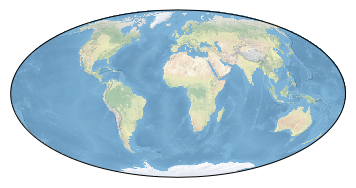

In [1]:
import matplotlib
#matplotlib.use("TkAgg")

import cartopy
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
ax = plt.axes(projection=ccrs.Mollweide())
ax.stock_img()
plt.show()

In [2]:
from geopy.geocoders import Nominatim
geolocator = Nominatim()
location = geolocator.geocode("Taiwan")
#print(location.address)
print((location.latitude, location.longitude))
print(location.raw)

(23.59829785, 120.835363138175)
{'place_id': '179822071', 'licence': 'Data © OpenStreetMap contributors, ODbL 1.0. http://www.openstreetmap.org/copyright', 'osm_type': 'relation', 'osm_id': '7219605', 'boundingbox': ['21.8968599', '25.2997353', '120.0341883', '122.0064049'], 'lat': '23.59829785', 'lon': '120.835363138175', 'display_name': '臺灣, 信義鄉, 南投縣, 臺灣', 'class': 'place', 'type': 'island', 'importance': 0.75910570161765}
